In [27]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('extract.csv', low_memory=False)

In [3]:
meta = pd.read_csv('../817_target.csv', low_memory=False)

In [255]:
df.Metadata_broad_sample.value_counts()

DMSO                      12553
BRD-A58048407-001-18-8      867
BRD-K48461310-234-01-3      866
BRD-K82467063-001-02-7      866
BRD-A53576514-048-14-3      830
                          ...  
BRD-K07310275-001-02-5        9
BRD-K12867552-001-04-7        9
BRD-K61397605-001-03-4        7
BRD-K12787259-001-04-3        2
BRD-K99475619-001-01-2        2
Name: Metadata_broad_sample, Length: 512, dtype: int64

In [258]:
# check why there us such a low support for some functions
df[df['Metadata_broad_sample'] == 'BRD-K99475619-001-01-2']

,Unnamed: 0,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_RNA,Metadata_ER,...,efficientnet_502,efficientnet_503,efficientnet_504,efficientnet_505,efficientnet_506,efficientnet_507,efficientnet_508,efficientnet_509,efficientnet_510,efficientnet_511
45688,0,SQ00015044,E01,5,BRD-K99475619-001-01-2,topoisomerase inhibitor,10.0,6,SQ00015044/r05c01f05p01-ch3sk1fk1fl1.png,SQ00015044/r05c01f05p01-ch2sk1fk1fl1.png,...,1.184230e-08,0.000001,5.650094e-09,1.910025e-08,0.000136,3.830110e-09,1.901173e-09,0.000003,9.517923e-07,1.699417e-08
45689,0,SQ00015045,E01,5,BRD-K99475619-001-01-2,topoisomerase inhibitor,10.0,6,SQ00015045/r05c01f05p01-ch3sk1fk1fl1.png,SQ00015045/r05c01f05p01-ch2sk1fk1fl1.png,...,7.703617e-07,0.000015,5.042711e-07,9.380246e-12,0.000035,6.436500e-08,1.093262e-07,0.596406,6.396553e-08,7.107612e-09


```
>>> df[(df['Class_Name'] == 'BRD-K99475619-001-01-2') & (df['Key'] == 'SQ00015044/E01-5')]
Empty DataFrame
Columns: [Unnamed: 0, Nuclei_Location_Center_X, Nuclei_Location_Center_Y, Key, Target, Class_Name, Image_Name]```
```
```
tf-docker /local_group_storage/broad_data/michael/training/inputs/locations/SQ00015044 > cat E01-5-Nuclei.csv
Nuclei_Location_Center_X,Nuclei_Location_Center_Y
678.55869659042,546.956193353475

```

In [4]:
print(df.shape)
features = [f for f in df.columns if f.startswith('eff')]
df.dropna(inplace=True, subset=features)
print(df.shape)

(217450, 535)
(217448, 535)


In [5]:
meta_dict = meta['Class_Name'].to_dict()
df.head()

,Unnamed: 0,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_RNA,Metadata_ER,...,efficientnet_502,efficientnet_503,efficientnet_504,efficientnet_505,efficientnet_506,efficientnet_507,efficientnet_508,efficientnet_509,efficientnet_510,efficientnet_511
0,0,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,5.150308e-10,3.259038e-10,9.464305e-10,1.643955e-08,2.043295e-08,1.586793e-10,2.947892e-10,2.685885e-09,8.916605e-08,3.845683e-07
1,1,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,4.069315e-14,2.413383e-13,6.382346e-12,3.731888e-09,5.664257e-12,4.116137e-14,6.130249e-12,1.409534e-11,1.045423e-11,6.232399e-03
2,2,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,2.631196e-11,5.441508e-11,5.723609e-10,6.753988e-09,1.084125e-11,1.478836e-11,2.005035e-09,1.775038e-09,1.760865e-07,2.253438e-03
3,3,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,6.187224e-12,4.501196e-11,4.187805e-11,4.466739e-07,1.543473e-10,1.227888e-11,2.245777e-11,1.199587e-09,7.243955e-11,9.503179e-03
4,4,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,4.718292e-13,5.334631e-12,1.131297e-11,1.054553e-07,2.038916e-12,3.208729e-12,3.299744e-11,3.973849e-11,3.524891e-13,3.181025e-02


In [265]:
features = [f for f in df.columns if f.startswith('eff')]

In [6]:
df['prediction'] = df[features].idxmax(axis = 1)
#top = df[features].apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

In [7]:
df['prediction'] = df['prediction'].str[13:].astype(int)

In [8]:
df['prediction'] = df['prediction'].replace(meta_dict)

In [9]:
df.head()

,Unnamed: 0,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_RNA,Metadata_ER,...,efficientnet_503,efficientnet_504,efficientnet_505,efficientnet_506,efficientnet_507,efficientnet_508,efficientnet_509,efficientnet_510,efficientnet_511,prediction
0,0,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,3.259038e-10,9.464305e-10,1.643955e-08,2.043295e-08,1.586793e-10,2.947892e-10,2.685885e-09,8.916605e-08,3.845683e-07,BRD-K78113049-001-16-2
1,1,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,2.413383e-13,6.382346e-12,3.731888e-09,5.664257e-12,4.116137e-14,6.130249e-12,1.409534e-11,1.045423e-11,6.232399e-03,BRD-K84986517-001-01-8
2,2,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,5.441508e-11,5.723609e-10,6.753988e-09,1.084125e-11,1.478836e-11,2.005035e-09,1.775038e-09,1.760865e-07,2.253438e-03,BRD-K78113049-001-16-2
3,3,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,4.501196e-11,4.187805e-11,4.466739e-07,1.543473e-10,1.227888e-11,2.245777e-11,1.199587e-09,7.243955e-11,9.503179e-03,BRD-K78113049-001-16-2
4,4,SQ00015048,F09,1,DMSO,unknown,0.0,0,SQ00015048/r06c09f01p01-ch3sk1fk1fl1.png,SQ00015048/r06c09f01p01-ch2sk1fk1fl1.png,...,5.334631e-12,1.131297e-11,1.054553e-07,2.038916e-12,3.208729e-12,3.299744e-11,3.973849e-11,3.524891e-13,3.181025e-02,BRD-K84986517-001-01-8


In [10]:
cols = ['Metadata_Plate', 'Metadata_Well', 'Metadata_Site',
       'Metadata_broad_sample', 'Metadata_moa', 'Metadata_Split', 'prediction']

dfs = df[cols]

In [271]:
dfs.head()

,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_Split,prediction
0,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2
1,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K84986517-001-01-8
2,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2
3,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2
4,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K84986517-001-01-8


In [13]:
labels = np.sort(dfs.Metadata_broad_sample.unique())

In [14]:
cmtx = metrics.confusion_matrix(dfs['Metadata_broad_sample'], dfs['prediction'], labels=labels)

In [15]:
meta = dfs.drop_duplicates(subset=['Metadata_broad_sample'])[['Metadata_broad_sample','Metadata_Well','Metadata_moa']]


In [16]:
df = pd.DataFrame(cmtx, columns=labels)
df['Metadata_broad_sample'] = labels
df = df.merge(meta, how='left', on='Metadata_broad_sample', validate='one_to_one')

In [276]:
df = pd.concat([df[['Metadata_broad_sample','Metadata_Well','Metadata_moa']],df[labels]], axis=1)
df.head()

,Metadata_broad_sample,Metadata_Well,Metadata_moa,BRD-A02006392-001-10-7,BRD-A03506276-001-01-5,BRD-A03623303-045-09-5,BRD-A04352665-001-05-3,BRD-A04553218-050-16-2,BRD-A05821830-341-01-5,BRD-A07395371-003-10-0,...,BRD-K98572433-001-02-9,BRD-K98624455-074-02-8,BRD-K99023089-001-03-7,BRD-K99107520-001-24-1,BRD-K99113996-001-02-0,BRD-K99257182-310-01-6,BRD-K99451608-001-07-3,BRD-K99475619-001-01-2,BRD-K99604664-001-01-1,DMSO
0,BRD-A02006392-001-10-7,G19,calcium channel blocker,235,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BRD-A03506276-001-01-5,A07,HSP inhibitor,0,12,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,BRD-A03623303-045-09-5,A13,adrenergic receptor antagonist,0,0,192,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BRD-A04352665-001-05-3,C01,CC chemokine receptor antagonist,0,0,0,81,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BRD-A04553218-050-16-2,D01,histamine receptor antagonist,0,0,0,136,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [280]:
df[['Metadata_Well', 'Metadata_broad_sample', 'Metadata_moa']].to_csv('labels.csv', index=False)

In [74]:
df.to_csv('confusion_matrix.csv', index=False)

In [75]:
report = metrics.classification_report(dfs['Metadata_broad_sample'], dfs['prediction'], labels=labels)

In [26]:
metrics.classification_report(dfs['Metadata_broad_sample'], dfs['prediction'], labels=labels, output_dict=True)

KeyError: 'Metadata_broad_sample'

In [83]:
df_report = pd.DataFrame(report_dict).transpose()
df_report

,precision,recall,f1-score,support
BRD-A02006392-001-10-7,0.491632,0.398981,0.440487,589.000000
BRD-A03506276-001-01-5,0.266667,0.750000,0.393443,16.000000
BRD-A03623303-045-09-5,0.145565,0.559767,0.231047,343.000000
BRD-A04352665-001-05-3,0.196602,0.291367,0.234783,278.000000
BRD-A04553218-050-16-2,0.248619,0.130814,0.171429,344.000000
...,...,...,...,...
BRD-K99604664-001-01-1,0.162162,0.146939,0.154176,245.000000
DMSO,0.304254,0.045009,0.078418,12553.000000
accuracy,0.287347,0.287347,0.287347,0.287347
macro avg,0.364397,0.370930,0.336750,217448.000000


In [209]:
sort = df_report.sort_values(by='f1-score', ascending=False)
sort

,precision,recall,f1-score,support
BRD-K99113996-001-02-0,0.979592,0.964824,0.972152,199.0
BRD-K95901403-001-04-5,0.977401,0.905759,0.940217,191.0
BRD-K72414522-001-06-7,0.929825,0.929825,0.929825,57.0
BRD-K61195623-001-01-4,0.920635,0.935484,0.928000,62.0
BRD-K61691541-001-01-1,0.867947,0.994498,0.926923,727.0
...,...,...,...,...
BRD-A97104540-004-15-0,0.000000,0.000000,0.000000,357.0
BRD-K95880107-001-02-4,0.000000,0.000000,0.000000,330.0
BRD-K97158071-001-18-1,0.000000,0.000000,0.000000,413.0
BRD-K97181089-003-24-7,0.000000,0.000000,0.000000,464.0


In [210]:
sort.index.tolist()

Index(['BRD-K99113996-001-02-0', 'BRD-K95901403-001-04-5',
       'BRD-K72414522-001-06-7', 'BRD-K61195623-001-01-4',
       'BRD-K61691541-001-01-1', 'BRD-K19687926-379-07-4',
       'BRD-A33280134-001-04-7', 'BRD-K86882815-001-03-2',
       'BRD-K57169635-001-04-5', 'BRD-K87909389-003-03-4',
       ...
       'BRD-K92731339-227-04-9', 'BRD-K93208532-001-02-5',
       'BRD-A97674275-001-11-8', 'BRD-K51485625-001-08-4',
       'BRD-K74339692-001-01-9', 'BRD-A97104540-004-15-0',
       'BRD-K95880107-001-02-4', 'BRD-K97158071-001-18-1',
       'BRD-K97181089-003-24-7', 'BRD-K79595931-312-01-3'],
      dtype='object', length=515)

In [77]:
y_true = dfs['Metadata_broad_sample']
y_pred = dfs['prediction']
metrics.accuracy_score(y_true, y_pred)

0.28734685993892795

In [ ]:
# %matplotlib qt
classes = dfs['Metadata_broad_sample'].unique()
classes.sort()
classes = { classes[i]:i for i in range(len(classes))}

cm = sklearn.metrics.confusion_matrix(dfs['Metadata_broad_sample'], dfs['prediction'])
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm.T/np.sum(cm, axis=1), cmap=plt.cm.Blues)
fig.colorbar(cax)
a = ax.set_yticks([x for x in classes.values()])
b = ax.set_yticklabels([x for x in classes.keys()])

In [70]:
dfs.to_csv('819_predictions.csv', index=False)

Does DMSO increase or decrease the overall accruacy ?
How to calc accuracy/ does DMSO effect it

What are compounds that are not distingishued from DMSO.
Do they have small scores? Do we want to get rid of them


Can we train on easy to distingueshly compounds. is the enrichment score gonna go up?

Ask Slack which ones are easy to distingiush from DMSO.

https://software.broadinstitute.org/morpheus/

Do Compounds get confused because they have the same MOA?


Get example images for the easily classifiable. Is that obvious for the eye?



Color each well with the accuracy / Precision how well it behaves.

Are confusions happening between Wells?

## important

!!!!! Take a easily classifiable compound. Mix them with DMSO and plot on PCA or UMAP
Do the same thing with badly identifiable Compound!

Why do some compounds only have a very low support?

In [283]:
# test weird confusions for well

dfs[dfs['Metadata_Well'] == 'F09'].Metadata_broad_sample.value_counts()

DMSO    2871
Name: Metadata_broad_sample, dtype: int64

In [141]:
t = df[df['Metadata_broad_sample'] == 'DMSO'].reset_index().drop(columns= ['index', 'Metadata_broad_sample',	'Metadata_Well',	'Metadata_Site',	'Metadata_moa'])


In [148]:
dmso_true = t.sort_values(axis=1, by=0, ascending=False).columns.to_list()

In [149]:
dmso_pred = df[['Metadata_broad_sample', 'DMSO']].sort_values(by='DMSO', ascending=False).Metadata_broad_sample.to_list()

In [152]:
ls = []
for c in dmso_true:
    ls.append(dmso_pred.index(c))

## prediction for MOAS

In [17]:
dfs = dfs.merge(meta, how='left', left_on='prediction', right_on='Metadata_broad_sample')

In [188]:
labels = np.sort(dfs.Metadata_moa_x.unique())
cm_moa = metrics.confusion_matrix(dfs['Metadata_moa_x'], dfs['Metadata_moa_y'])

In [189]:
df = pd.DataFrame(cm_moa, columns=labels)
df['Metadata_moa'] = labels
df = pd.concat([df[['Metadata_moa']],df[labels]], axis=1)


In [ ]:
df.head()

In [169]:
df.to_csv('confusion_matrix_moa.csv', index=False)

In [170]:
print(metrics.classification_report(dfs['Metadata_moa_x'], dfs['Metadata_moa_y'], labels=labels))


                                                            precision    recall  f1-score   support

                                             AKT inhibitor       0.58      0.43      0.50      2082
                                   Aurora kinase inhibitor       0.43      0.64      0.51       461
                          CC chemokine receptor antagonist       0.22      0.30      0.25      2429
                                             CDK inhibitor       0.63      0.67      0.65       613
                                             DNA inhibitor       0.26      0.28      0.27      2712
                                            EGFR inhibitor       0.62      0.58      0.60      3504
                                             HCV inhibitor       0.37      0.37      0.37      2219
                                            HDAC inhibitor       0.60      0.64      0.62      1226
                                    HIV protease inhibitor       0.33      0.31      0.32      2986

## prediction for Wells

In [12]:
dfs.head()

,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_Split,prediction
0,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2
1,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K84986517-001-01-8
2,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2
3,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2
4,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K84986517-001-01-8


In [18]:
labels = np.sort(dfs.Metadata_Well_x.unique())
cm_well = metrics.confusion_matrix(dfs['Metadata_Well_x'], dfs['Metadata_Well_y'])

In [19]:
df = pd.DataFrame(cm_well, columns=labels)
df['Metadata_Well'] = labels
df = pd.concat([df[['Metadata_Well']],df[labels]], axis=1)


In [22]:
dfs.head()

,Metadata_Plate,Metadata_Well_x,Metadata_Site,Metadata_broad_sample_x,Metadata_moa_x,Metadata_Split,prediction,Metadata_broad_sample_y,Metadata_Well_y,Metadata_moa_y
0,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2,BRD-K78113049-001-16-2,L19,topoisomerase inhibitor
1,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K84986517-001-01-8,BRD-K84986517-001-01-8,D13,HIV protease inhibitor
2,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2,BRD-K78113049-001-16-2,L19,topoisomerase inhibitor
3,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K78113049-001-16-2,BRD-K78113049-001-16-2,L19,topoisomerase inhibitor
4,SQ00015048,F09,1,DMSO,unknown,Test,BRD-K84986517-001-01-8,BRD-K84986517-001-01-8,D13,HIV protease inhibitor


In [177]:
df.to_csv('confusion_matrix_Well.csv', index=False)

In [178]:
print(metrics.classification_report(dfs['Metadata_Well_x'], dfs['Metadata_Well_y'], labels=labels))


/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

         A06       0.00      0.00      0.00      2189
         A07       0.41      0.36      0.39      4439
         A13       0.36      0.42      0.39      3586
         A19       0.52      0.49      0.51      2422
         B06       0.00      0.00      0.00      4410
         B07       0.24      0.21      0.22      3637
         B13       0.23      0.18      0.20      3343
         B19       0.22      0.29      0.25      3353
         C01       0.37      0.52      0.43      4655
         C07       0.34      0.21      0.26      3523
         C13       0.33      0.21      0.26      3113
         D01       0.35      0.41      0.38      4071
         D07       0.25      0.34      0.29      4027
         D13       0.29      0.40      0.34      2641
         D19       0.22      0.25      0.23      2512
         E01       0.37      0.49      0.42      3168
         E07       0.53      0.42      0.47      3063
         E13       0.31    

In [185]:
df[df['Metadata_Well'] == 'A06'

,Metadata_Well,A06,A07,A13,A19,B06,B07,B13,B19,C01,...,N07,N13,N19,O07,O13,O19,P01,P07,P13,P19
0,A06,0,42,117,0,0,56,8,3,44,...,0,145,1,0,4,0,1,2,0,3


In [25]:
# Check which wells are DMSO
dfs[dfs["Metadata_broad_sample_x"] == 'DMSO'].Metadata_Well_x.value_counts()

B06    4410
J15    3083
F09    2871
A06    2189
Name: Metadata_Well_x, dtype: int64

Take a easily classifiable compound. Mix them with DMSO and plot on PCA or UMAP
Do the same thing with badly identifiable Compound!

In [215]:
# Top compounds for prediction:
c = sort[:10].index.to_list()
c.append('DMSO')

In [245]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/819/819_aggregated_median.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
df = df[df['Metadata_broad_sample'].isin(c)]

In [219]:
from sklearn.decomposition import PCA
df.Metadata_broad_sample.value_counts()

DMSO                      3251
BRD-K72414522-001-06-7       5
BRD-K95901403-001-04-5       5
BRD-K61691541-001-01-1       5
BRD-K87909389-003-03-4       5
BRD-K19687926-379-07-4       5
BRD-K57169635-001-04-5       5
BRD-K99113996-001-02-0       5
BRD-K61195623-001-01-4       5
BRD-A33280134-001-04-7       5
BRD-K86882815-001-03-2       5
Name: Metadata_broad_sample, dtype: int64

Explained variation per principal component: [0.06414899 0.04999811 0.04719665]


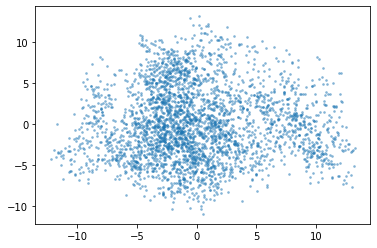

In [247]:
features = [f for f in df.columns if f.startswith('eff')]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'], df['pca-two'], s = 3, alpha= 0.4)
plt.show()


In [250]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 0.8
    else:
        return 0

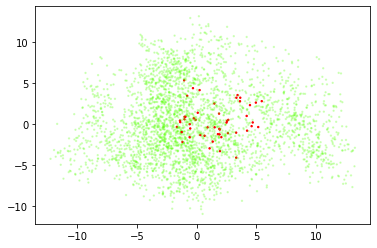

In [251]:
df = df.sample(frac=1).reset_index(drop=True)
df['color'] = df.Metadata_broad_sample.apply(is_dmso)
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'], df['pca-two'], c = df['color'], marker= 'o', s = 2, alpha= 1- df['color'], cmap = 'prism')
plt.show()

In [222]:
# try umap
import umap
reducer = umap.UMAP()

In [224]:
embedding = reducer.fit_transform(df[features])
embedding.shape

(3301, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

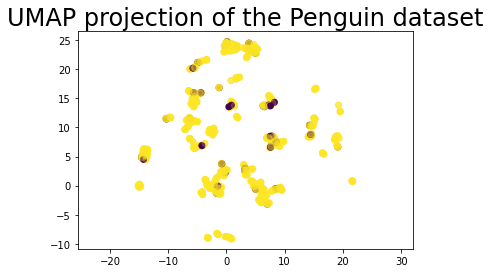

In [235]:
df['color'] = df.Metadata_broad_sample.apply(is_dmso)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = df['color'],
alpha= 1- df['color'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [252]:
# Do the same things above but with spherized data.
# df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/819/819_aggregated_median.csv')
features = [f for f in df.columns if f.startswith('eff')]
from pycytominer import aggregate, normalize
sphere = normalize(
    profiles=df,
    features=features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='spherize',
    output_file='none'
)


Explained variation per principal component: [0.08827497 0.0475594  0.0345471 ]


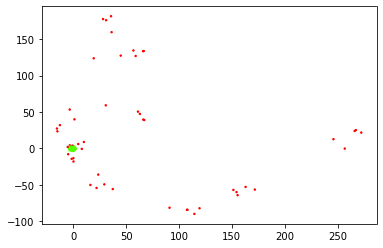

In [253]:
sphere = sphere.sample(frac=1).reset_index(drop=True)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(sphere[features].values)
sphere['pca-one'] = pca_result[:,0]
sphere['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sphere['color'] = sphere.Metadata_broad_sample.apply(is_dmso)
plt.style.use({'figure.facecolor':'white'})
plt.scatter(sphere['pca-one'], sphere['pca-two'], c = sphere['color'], marker= 'o', s = 2, alpha= 1- sphere['color'], cmap = 'prism')
plt.show()

